Valendo-se da base de dados reais referente ao Volume de Vendas de Passagens (VVP) de uma companhia aérea norte-americana que se encontra no arquivo vvp.xlsx, pede-se:<br>
1) Desenvolver um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Os dados se encontram no arquivo 'vvp.csv'.

Epoch 1/100
4/4 [==============================] - 1s 56ms/step - loss: 0.1791 - val_loss: 0.4749
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1282 - val_loss: 0.3385
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0870 - val_loss: 0.2282
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0560 - val_loss: 0.1461
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0340 - val_loss: 0.0856
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0189 - val_loss: 0.0432
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 0.0183
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0098 - val_loss: 0.0068
Epoch 11/100
4/4 [=

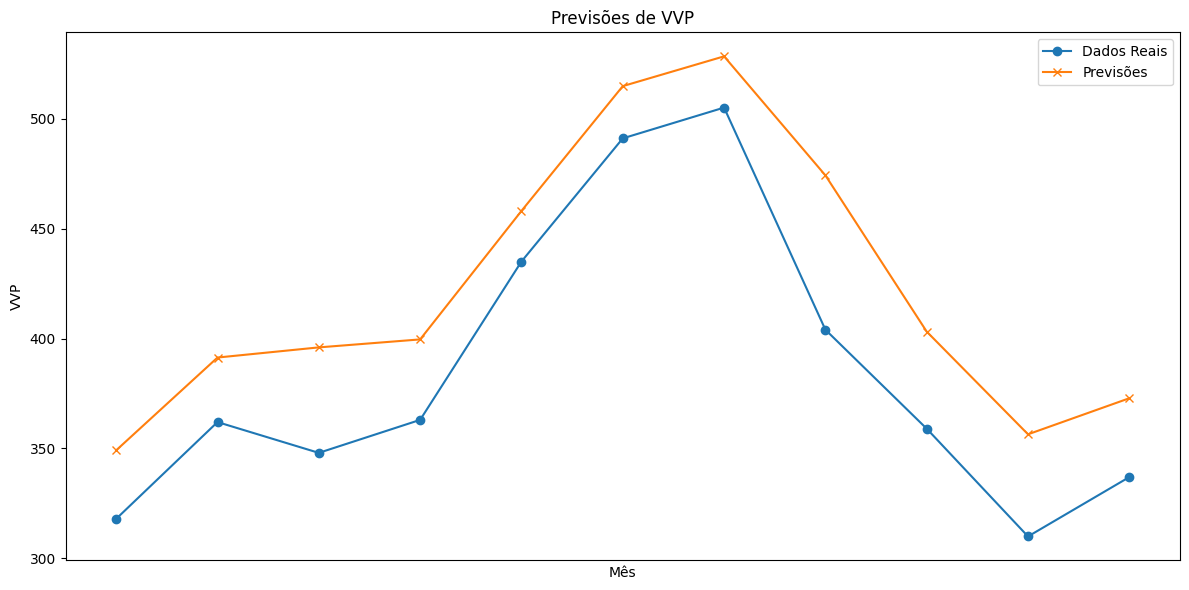

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Carregando os dados
data = pd.read_csv('vvp.csv')

# Certifique-se de que os dados estão classificados por data
data['Date'] = pd.to_datetime(data['mes'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Normalizando os dados
scaler = MinMaxScaler()
data['VVP'] = scaler.fit_transform(data['VVP'].values.reshape(-1, 1))

# Adicionando colunas de deslocamento (k-1 e k-12)
data['VVP_lag1'] = data['VVP'].shift(1)
data['VVP_lag12'] = data['VVP'].shift(12)

# Removendo valores ausentes
data = data.dropna()

# Separando recursos (X) e alvo (y)
X = data[['VVP_lag1', 'VVP_lag12']]
y = data['VVP']

# Dividindo os dados em treinamento e teste
split_ratio = 0.9
split_index = int(split_ratio * len(data))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Construindo o modelo neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Previsões
y_pred = model.predict(X_test)

# Invertendo a escala para obter previsões reais
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Visualização dos dados e previsões
plt.figure(figsize=(12, 6))
plt.plot(data.index[split_index:], y_test_inv, label='Dados Reais', marker='o')
plt.plot(data.index[split_index:], y_pred_inv, label='Previsões', marker='x')
plt.xlabel('Mês')
plt.ylabel('VVP')
plt.title('Previsões de VVP')
plt.legend()
plt.tight_layout()
plt.show()


2) De posse da base de dados, remova a tendência linear presente na base de dados original. Desse modo, você conhecerá a série destendenciada e a tendência linear. Para a primeira série, desenvolva um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Para a segunda (i.e., a tendência linear), preveja linearmente os próximos dozes pontos. Em seguida, some ponto a ponto as duas previsões e compare o desempenho dessa abordagem com a anterior apontando qual delas apresenta uma maior capacidade de generalização.

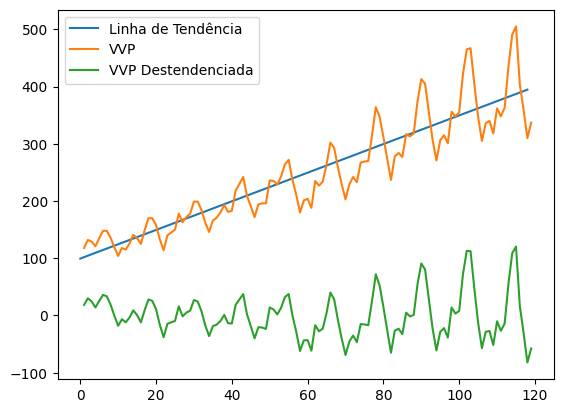

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregue a base de dados do arquivo CSV
data = pd.read_csv('vvp.csv') 

# Suponha que 'data' contenha a coluna 'VVP' que representa o Volume de Vendas de Passagens

# Calcule a diferença entre cada ponto e o ponto anterior
data['VVP_diff'] = data['VVP'] - data['VVP'].shift(1)

# A primeira entrada resultará em um NaN, então você pode removê-la
data = data.dropna()

X = [i for i in range(0, len(data['VVP']))]
X = np.reshape(X, (len(X), 1))
y = data['VVP']

# Crie um objeto de modelo de regressão linear para a tendência linear
model_trend = LinearRegression()


model_trend.fit(X,y)
trend = model_trend.predict(X)

plt.plot(trend, label = 'Linha de Tendência')
plt.plot(y, label = 'VVP')

data['VVP_destendenciada'] = data['VVP'] - trend
plt.plot(data['VVP_destendenciada'], label= 'VVP Destendenciada')

plt.legend()

Epoch 1/100
3/3 [==============================] - 1s 86ms/step - loss: 0.1378 - val_loss: 0.1733
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0972 - val_loss: 0.1261
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0662 - val_loss: 0.0905
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0436 - val_loss: 0.0654
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0266 - val_loss: 0.0495
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0170 - val_loss: 0.0414
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0133 - val_loss: 0.0390
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0124 - val_loss: 0.0391
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0135 - val_loss: 0.0394
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0384
Epoch 11/100
3/3 [=

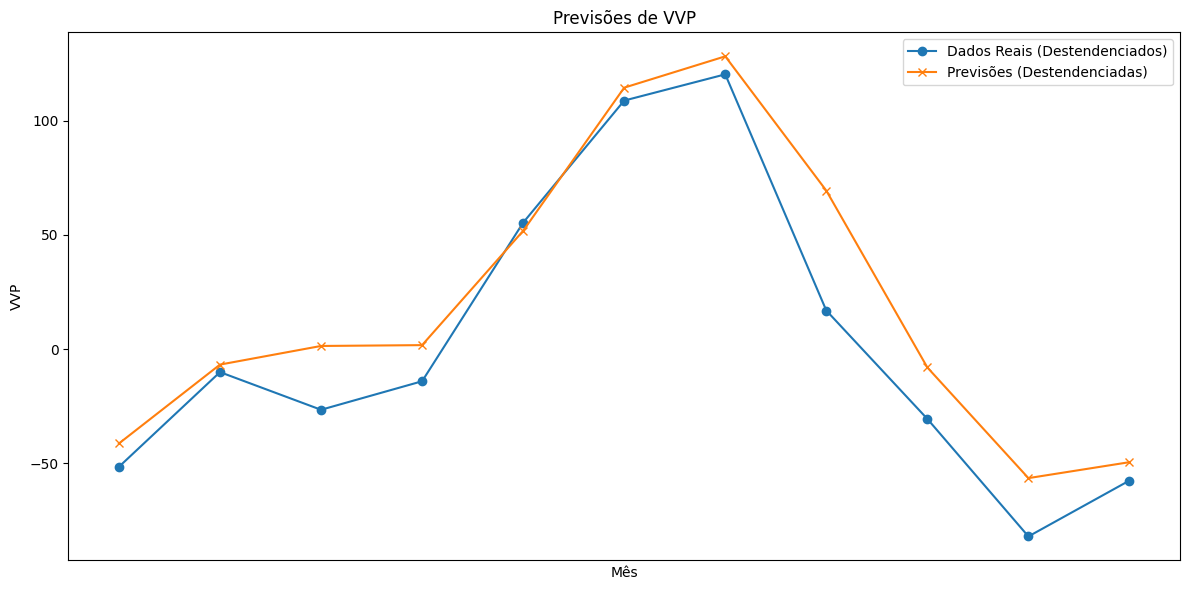

In [23]:
# Certifique-se de que os dados estão classificados por data
data['Date'] = pd.to_datetime(data['mes'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Normalizando os dados
scaler = MinMaxScaler()
data['VVP_destendenciada'] = scaler.fit_transform(data['VVP_destendenciada'].values.reshape(-1, 1))

# Adicionando colunas de deslocamento (k-1 e k-12)
data['VVP_lag1'] = data['VVP_destendenciada'].shift(1)
data['VVP_lag12'] = data['VVP_destendenciada'].shift(12)

# Removendo valores ausentes
data = data.dropna()

# Separando recursos (X) e alvo (y)
X = data[['VVP_lag1', 'VVP_lag12']]
y = data['VVP_destendenciada']

# Dividindo os dados em treinamento e teste
split_ratio = 0.9
split_index = int(split_ratio * len(data))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Construindo o modelo neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Previsões
y_pred = model.predict(X_test)

# Invertendo a escala para obter previsões reais
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Visualização dos dados e previsões
plt.figure(figsize=(12, 6))
plt.plot(data.index[split_index:], y_test_inv, label='Dados Reais (Destendenciados)', marker='o')
plt.plot(data.index[split_index:], y_pred_inv, label='Previsões (Destendenciadas)', marker='x')
plt.xlabel('Mês')
plt.ylabel('VVP')
plt.title('Previsões de VVP')
plt.legend()
plt.tight_layout()
plt.show()